<a href="https://colab.research.google.com/github/anderson-ru/homework_course/blob/the_main/ods__2_homework_(visual).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# **Data download**

https://drive.google.com/file/d/1PwVlFTuHit5exEVkNOJ8BejwCgs0Tgvz/view?usp=sharing
https://drive.google.com/file/d/1qmsSz4Ac7Jtuz2e-sfSqxMbybnkoYlF8/view?usp=sharing

In [ ]:
! gdown --id 1PwVlFTuHit5exEVkNOJ8BejwCgs0Tgvz
! gdown --id 1qmsSz4Ac7Jtuz2e-sfSqxMbybnkoYlF8

Downloading...
From: https://drive.google.com/uc?id=1PwVlFTuHit5exEVkNOJ8BejwCgs0Tgvz
To: /content/howpop_test.csv
100% 813k/813k [00:00<00:00, 53.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1qmsSz4Ac7Jtuz2e-sfSqxMbybnkoYlF8
To: /content/howpop_train.csv
100% 34.0M/34.0M [00:00<00:00, 93.1MB/s]


In [ ]:
df = pd.read_csv("howpop_train.csv")
df.shape

(134137, 17)

In [ ]:
df.head(3).T 

,0,1,2
url,https://habrahabr.ru/post/18284/,https://habrahabr.ru/post/18285/,https://habrahabr.ru/post/18286/
domain,habrahabr.ru,habrahabr.ru,habrahabr.ru
post_id,18284,18285,18286
published,2008-01-01 18:19:00,2008-01-01 18:30:00,2008-01-01 18:34:00
author,@Tapac,@DezmASter,@DezmASter
flow,develop,design,design
polling,False,False,False
content_len,4305,7344,8431
title,Новогодний подарок блоггерам — WordPress 2.3.2,"Сумасшедшие яйца, или сервис для отслеживания ...","Сумасшедшие яйца, или сервис для отслеживания ..."
comments,0,1,47


**Избавимся сразу от переменных, названия которых заканчиваются на _lognorm (нужны для соревнования на Kaggle). Выберем их с помощью filter() и удалим drop-ом:**

In [ ]:
df.drop(
    filter(lambda c: c.endswith("_lognorm"), df.columns),
    axis=1,  # axis = 1: столбцы
    inplace=True,
)  # избавляет от необходимости сохранять датасет

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
post_id,134137.0,181307.054265,81766.350702,18284.0,115565.0,182666.0,257401.0,314088.0
content_len,134137.0,7516.929699,8724.771640,1.0,2179.0,4949.0,9858.0,352471.0
comments,134137.0,39.625994,62.398958,0.0,7.0,19.0,48.0,2266.0
favs,134137.0,71.999866,145.854135,0.0,8.0,27.0,78.0,8718.0
views,134137.0,16631.013084,31479.819691,3.0,2100.0,7600.0,18700.0,1730000.0
votes_plus,133566.0,35.536888,42.461073,0.0,11.0,22.0,45.0,1466.0
votes_minus,133566.0,8.050035,11.398282,0.0,2.0,5.0,10.0,445.0


In [ ]:
df.describe(include=["object", "bool"]).T  # бинарные и категориальные переменные

,count,unique,top,freq
url,134137,134137,https://habrahabr.ru/post/132392/,1
domain,134137,2,habrahabr.ru,97048
published,134137,130291,2011-06-14 15:52:00,39
author,97657,22077,@alizar,5292
flow,97048,6,develop,53318
polling,134137,2,False,129412
title,134137,133628,"Интересные события, произошедшие в выходные",56


In [ ]:
# настройка внешнего вида графиков в seaborn
sns.set_style("dark")
sns.set_palette("RdBu")
sns.set_context(
    "notebook", font_scale=1.5, rc={"figure.figsize": (15, 5), "axes.titlesize": 18}
)

Столбец published (время публикации) содержит строки. Чтобы мы могли работать с этими данными как с датой/временем публикации, приведём их к типу datetime:

In [ ]:
print(df.published.dtype)
df["published"] = pd.to_datetime(df.published, yearfirst=True)
print(df.published.dtype)

object
datetime64[ns]


**Создадим несколько столбцов на основе данных о времени публикации:**

In [ ]:
df["year"] = [d.year for d in df.published]
df["month"] = [d.month for d in df.published]

df["dayofweek"] = [d.isoweekday() for d in df.published]
df["hour"] = [d.hour for d in df.published]

# **1. В каком месяце (и какого года) было больше всего публикаций?**

март 2016

март 2015

апрель 2015

апрель 2016

In [ ]:
df.groupby(['year', 'month'], sort=True)['content_len'].count()

year  month
2008  1         435
      2         496
      3         545
      4         597
      5         635
               ... 
2016  6        1498
      7        1278
      8        1278
      9        1482
      10       1493
Name: content_len, Length: 106, dtype: int64

In [ ]:
df.groupby(['year', 'month'], sort=True)['content_len'].count().max() # максимальное число публикаций

2189

In [ ]:
df.year.unique() # все года, которые есть в данных

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016])

In [ ]:
year = 2008
month = 0
count = 0
for i in df.groupby(['year', 'month'], sort=True)['content_len'].count():
  count += 1
  if i == 2189:
    break
print(year + count//12, "year", month + count%12, "month") # год и месяц 
# (1 способ нахождения)

2015 year 3 month


In [ ]:
df['year_month'] = [str(p)[:7] for p in df.published] # создание новой колонки
print(df.year_month.value_counts(sort=False))

2008-04     597
2015-08    1849
2015-09    1944
2013-03    1327
2009-06     733
           ... 
2010-01    1010
2012-10    1421
2008-03     545
2016-04    1910
2012-04    1330
Name: year_month, Length: 106, dtype: int64


In [ ]:
print(df.year_month.value_counts(sort=True)) # отсортированные значения 

2015-03    2189
2016-03    2115
2015-07    2111
2015-04    2110
2015-12    2084
           ... 
2008-06     599
2008-04     597
2008-03     545
2008-02     496
2008-01     435
Name: year_month, Length: 106, dtype: int64


In [ ]:
most = df.year_month.value_counts().index[0]
print(most) # 2 способ

2015-03


# **2. Проанализируйте публикации в месяце из предыдущего вопроса**

Выберите один или несколько вариантов:

1) Один или несколько дней сильно выделяются из общей картины

2) На хабре всегда больше статей, чем на гиктаймсе

3) По субботам на гиктаймс и на хабрахабр публикуют примерно одинаковое число статей

Подсказки: постройте график зависимости числа публикаций от дня; используйте параметр hue; не заморачивайтесь сильно с ответами и не ищите скрытого смысла :)

In [ ]:
df["day"] = [d.day for d in df.published]

In [ ]:
data = df[df['year-month'] == '2015-03'].drop(['url', 'flow', 'polling', 'title', 'post_id', 'favs', 'views', 'votes_plus'], axis=True)

In [ ]:
df[df.year.isin(top)].groupby('author')[['votes_minus']].mean().sort_values('votes_minus')

,votes_minus
author,


In [ ]:
day = list(range(1, 32))
count = []
for i in day:
  count.append(data[data['day'] == i].count()[1])

print(day)
print(count)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
[32, 98, 94, 98, 72, 71, 31, 26, 42, 98, 92, 99, 78, 30, 30, 99, 107, 80, 88, 74, 22, 30, 78, 86, 92, 89, 92, 32, 38, 79, 112]


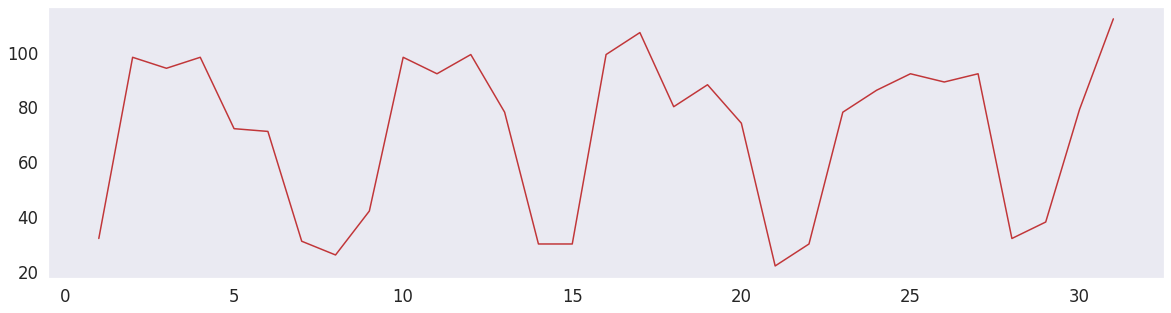

In [ ]:
fig = plt.figure(figsize=(20,5))
plt.plot(day, count)

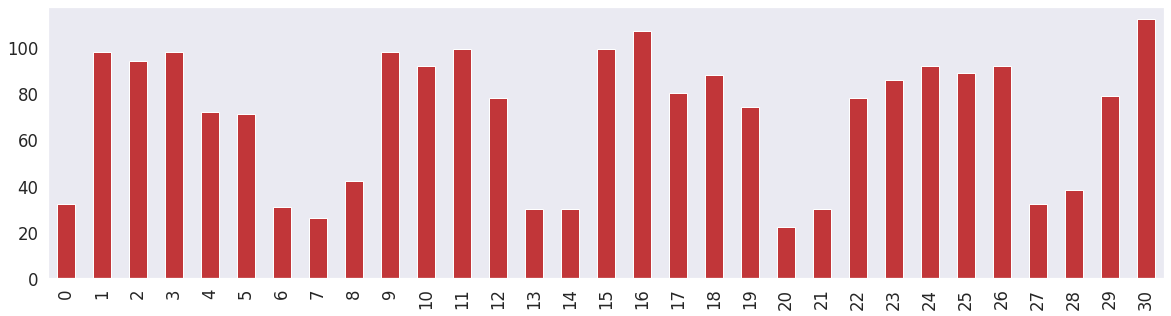

In [ ]:
s = pd.Series(count)
fig = plt.figure(figsize=(20,5))
s.plot(kind='bar')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


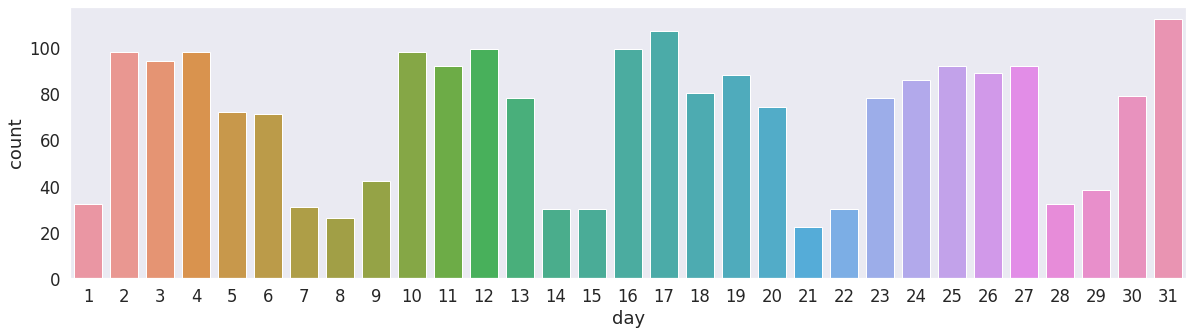

In [ ]:
df_most = df[df.year_month == most]
df_most['day'] = [p.day for p in df_most.published]
fig = plt.figure(figsize=(20,5))
sns.countplot(x = 'day', data = df_most);

In [ ]:
data.head()

,domain,published,author,content_len,comments,votes_minus,year,month,dayofweek,hour,day,mon_yr,year-month,year_month,month_day
97666,habrahabr.ru,2015-03-01 00:00:00,@SLY_G,49647,6,4.0,2015,3,7,0,1,2015-03,2015-03,2015-03,03-01
97667,habrahabr.ru,2015-03-01 00:09:00,NaN,8581,14,2.0,2015,3,7,0,1,2015-03,2015-03,2015-03,03-01
97668,habrahabr.ru,2015-03-01 07:13:00,@semen_grinshtein,1883,12,4.0,2015,3,7,7,1,2015-03,2015-03,2015-03,03-01
97669,habrahabr.ru,2015-03-01 07:52:00,@Makeman,48658,6,4.0,2015,3,7,7,1,2015-03,2015-03,2015-03,03-01
97670,habrahabr.ru,2015-03-01 10:30:00,@Doomer3D,40374,4,1.0,2015,3,7,10,1,2015-03,2015-03,2015-03,03-01


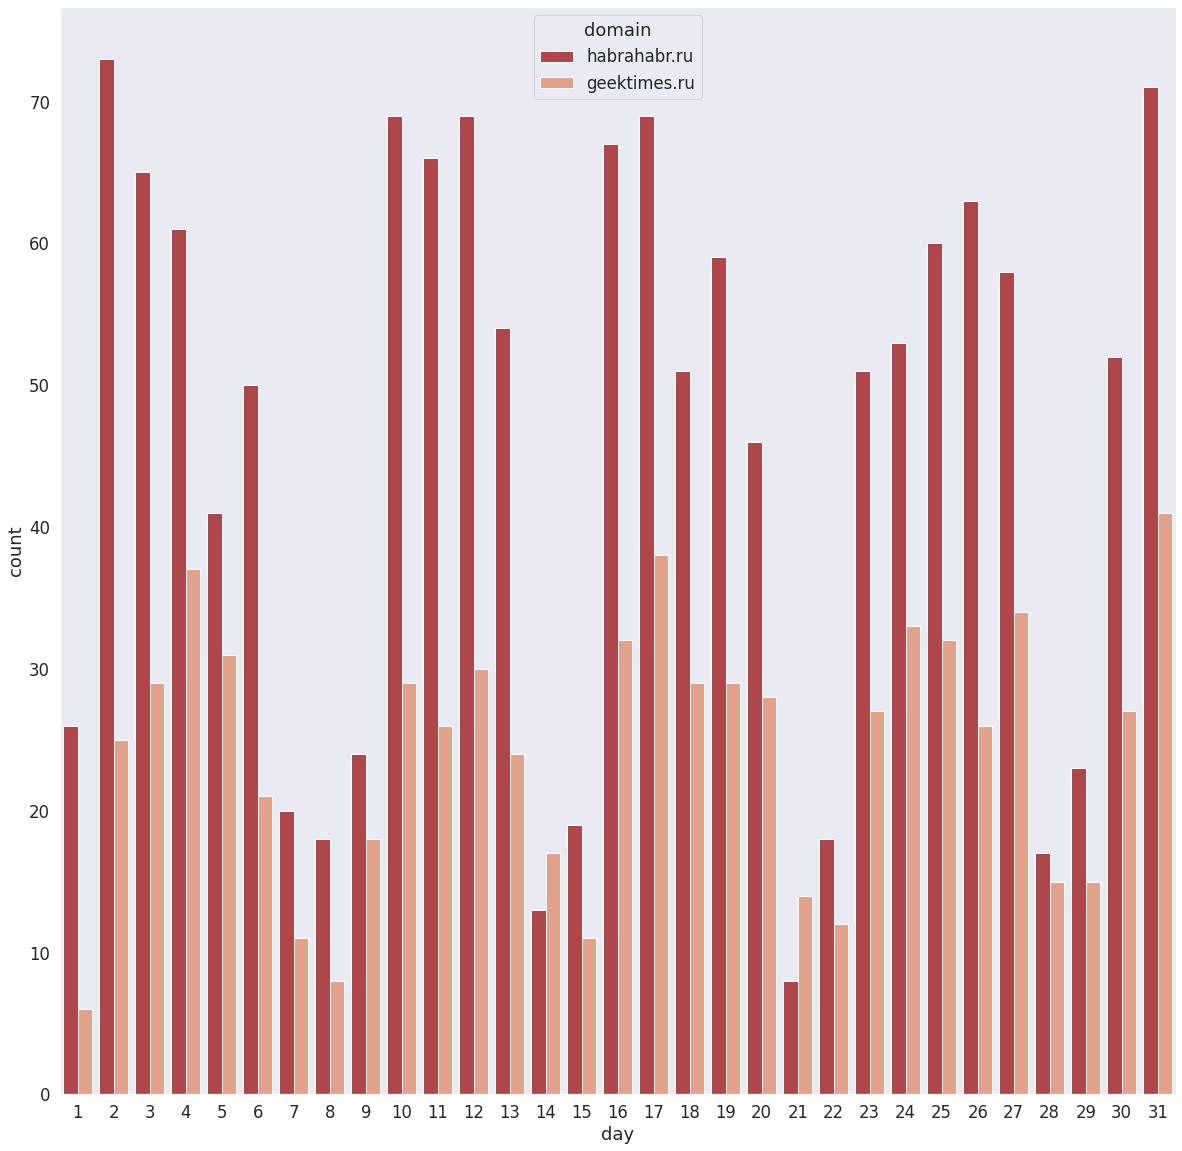

In [ ]:
fig = plt.figure(figsize=(20,20))
sns.countplot(x = 'day', hue = 'domain', data = data);

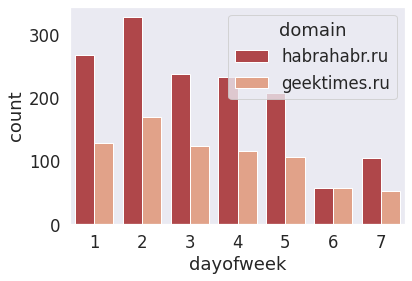

In [ ]:
#fig = plt.figure(figsize=(10,10))
sns.countplot(x = 'dayofweek', hue = 'domain', data = data);

#**3. Когда лучше всего публиковать статью?**

1) Больше всего просмотров набирают статьи, опубликованные в 12 часов дня

2) У опубликованных в 10 утра постов больше всего комментариев

3) Больше всего просмотров набирают статьи, опубликованные в 6 часов утра

4) Максимальное число комментариев на гиктаймсе набрала статья, опубликованная в 9 часов вечера

5) На хабре дневные статьи комментируют чаще, чем вечерние

In [ ]:
df.head()

,url,domain,post_id,published,author,flow,polling,content_len,title,comments,favs,views,votes_plus,votes_minus,year,month,dayofweek,hour,day,mon_yr,year-month,year_month,month_day
0,https://habrahabr.ru/post/18284/,habrahabr.ru,18284,2008-01-01 18:19:00,@Tapac,develop,False,4305,Новогодний подарок блоггерам — WordPress 2.3.2,0,0,236,0.0,0.0,2008,1,2,18,1,2008-01,2008-01,2008-01,01-01
1,https://habrahabr.ru/post/18285/,habrahabr.ru,18285,2008-01-01 18:30:00,@DezmASter,design,False,7344,"Сумасшедшие яйца, или сервис для отслеживания ...",1,1,353,1.0,0.0,2008,1,2,18,1,2008-01,2008-01,2008-01,01-01
2,https://habrahabr.ru/post/18286/,habrahabr.ru,18286,2008-01-01 18:34:00,@DezmASter,design,False,8431,"Сумасшедшие яйца, или сервис для отслеживания ...",47,72,1200,45.0,5.0,2008,1,2,18,1,2008-01,2008-01,2008-01,01-01
3,https://habrahabr.ru/post/18291/,habrahabr.ru,18291,2008-01-02 01:32:00,@Taoorus,design,False,5662,"Сглаживание шрифтов, и субпиксельная отрисовка",102,36,5700,72.0,3.0,2008,1,3,1,2,2008-01,2008-01,2008-01,01-02
4,https://geektimes.ru/post/18294/,geektimes.ru,18294,2008-01-02 14:34:00,@dennydo,NaN,False,3706,Почему мне не нравится iPhone,230,6,1400,73.0,15.0,2008,1,3,14,2,2008-01,2008-01,2008-01,01-02


In [ ]:
print(df.groupby('hour')['views'].mean().sort_values(ascending=False)[:10])

hour
6     21354.310115
4     20678.389091
7     19093.953408
3     18370.017972
22    18365.387460
20    18134.614873
1     17717.709114
23    17631.345932
21    17605.819064
0     17546.982349
Name: views, dtype: float64


In [ ]:
print(df.groupby('hour')['comments'].mean().sort_values(ascending=False)[:10])

hour
4     53.657273
3     53.123877
6     51.799618
1     49.417910
2     48.827025
0     48.389066
5     47.816686
21    46.669970
22    46.373220
20    45.822556
Name: comments, dtype: float64


In [ ]:
df.sort_values(by='comments', ascending=False)

,url,domain,post_id,published,author,flow,polling,content_len,title,comments,favs,views,votes_plus,votes_minus,year,month,dayofweek,hour,day,mon_yr,year-month,year_month,month_day
38763,https://geektimes.ru/post/123157/,geektimes.ru,123157,2011-07-01 02:35:00,@Dottore,NaN,False,2158,Как раздавать инвайты на Google+,2266,24,15300,226.0,55.0,2011,7,5,2,1,2011-07,2011-07,2011-07,07-01
5018,https://habrahabr.ru/company/tm/blog/39689/,habrahabr.ru,39689,2008-09-12 09:44:00,NaN,misc,False,17,"Hello, world!",2194,16,9400,NaN,NaN,2008,9,5,9,12,2008-09,2008-09,2008-09,09-12
65285,https://geektimes.ru/post/171853/,geektimes.ru,171853,2013-03-06 20:07:00,@vadimus,NaN,False,2220,Лучшие компьютерные игры всех времен и народов...,1887,392,160000,170.0,29.0,2013,3,3,20,6,2013-03,2013-03,2013-03,03-06
38742,https://geektimes.ru/post/123122/,geektimes.ru,123122,2011-06-30 17:10:00,@MetallicAt,NaN,False,1390,Раздача слонов или инвайты на Google+,1829,17,1200,275.0,50.0,2011,6,4,17,30,2011-06,2011-06,2011-06,06-30
48453,https://habrahabr.ru/post/138291/,habrahabr.ru,138291,2012-02-16 01:04:00,@BannedMi,admin,False,3378,Ещё +2Гб для вашего DropBox аккаунта. На сей р...,1729,152,12100,285.0,54.0,2012,2,4,1,16,2012-02,2012-02,2012-02,02-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81343,https://habrahabr.ru/company/infobox/blog/216563/,habrahabr.ru,216563,2014-03-21 00:11:00,NaN,develop,False,7621,Java 8 в IaaS InfoboxCloud в одну команду. Исп...,0,22,5100,15.0,4.0,2014,3,5,0,21,2014-03,2014-03,2014-03,03-21
81340,https://habrahabr.ru/company/likeastore/blog/2...,habrahabr.ru,216549,2014-03-20 20:20:00,NaN,misc,False,1756,Собираем лучшее в коллекции и делимся с другими,0,4,2200,5.0,0.0,2014,3,4,20,20,2014-03,2014-03,2014-03,03-20
81320,https://habrahabr.ru/company/Ciklum/blog/216497/,habrahabr.ru,216497,2014-03-20 14:14:00,NaN,misc,False,2136,Эволюция гибких фреймворков: Scrum-And в плани...,0,2,1900,2.0,1.0,2014,3,4,14,20,2014-03,2014-03,2014-03,03-20
81317,https://habrahabr.ru/post/216383/,habrahabr.ru,216383,2014-03-20 13:31:00,@KirillLevitskiy,management,False,8231,Как я сделал подсветку конкретных значений в т...,0,8,5200,6.0,1.0,2014,3,4,13,20,2014-03,2014-03,2014-03,03-20


[44.037267080745345, 45.10339875538535, 44.95974025974026, 47.07741935483871, 49.458930899608866, 44.87765089722675, 45.24029850746269, 39.651928504233304, 33.11909871244635, 33.39934533551555, 30.089079013588325, 30.183618117710875, 30.585102511221642, 31.688633839318772, 31.833743045672144, 32.24425887265136, 33.732798165137616, 34.805608667941364, 35.59286638329329, 37.205821682328676, 41.0547052154195, 40.17856, 40.94170984455958, 38.94506906521041]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


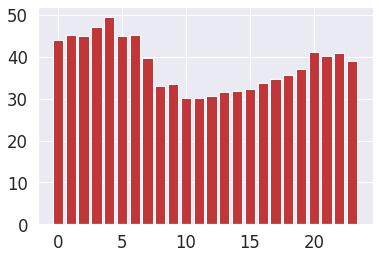

In [ ]:
comments = df[df.domain == 'habrahabr.ru'].groupby('hour')[['comments']].mean()["comments"]
print(list(comments))
hour = list(range(24)) 
print(hour)

fig = plt.figure()
plt.bar(hour, comments)
plt.grid(True)
plt.show()

[44.037267080745345, 45.10339875538535, 44.95974025974026, 47.07741935483871, 49.458930899608866, 44.87765089722675, 45.24029850746269, 39.651928504233304, 33.11909871244635, 33.39934533551555, 30.089079013588325, 30.183618117710875, 30.585102511221642, 31.688633839318772, 31.833743045672144, 32.24425887265136, 33.732798165137616, 34.805608667941364, 35.59286638329329, 37.205821682328676, 41.0547052154195, 40.17856, 40.94170984455958, 38.94506906521041]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


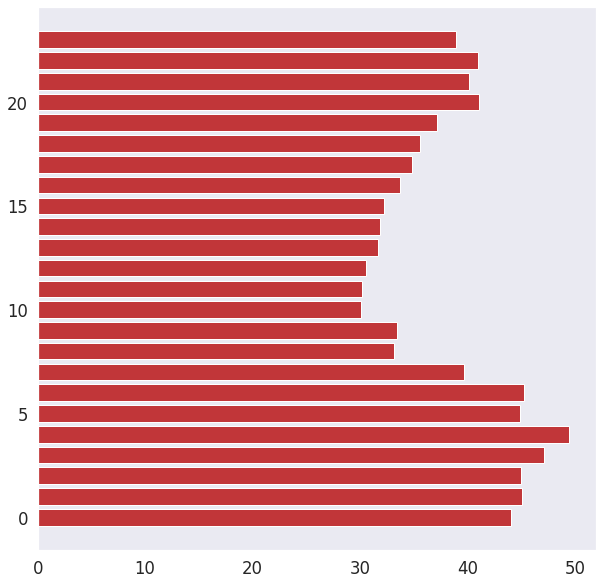

In [ ]:
comments = df[df.domain == 'habrahabr.ru'].groupby('hour')[['comments']].mean()["comments"]
print(list(comments))
hour = list(range(24)) 
print(hour)

plt.figure(figsize=(10,10))
plt.barh(hour,comments)
plt.show()

In [ ]:
comments = df[df.domain == 'habrahabr.ru'].groupby('hour')[['comments']].mean()["comments"]
print(list(comments))
hour = list(range(24)) 
print(hour)
#print(list(hour))
#df[df.domain == 'habrahabr.ru'].groupby('hour')[['comments']].mean()

[44.037267080745345, 45.10339875538535, 44.95974025974026, 47.07741935483871, 49.458930899608866, 44.87765089722675, 45.24029850746269, 39.651928504233304, 33.11909871244635, 33.39934533551555, 30.089079013588325, 30.183618117710875, 30.585102511221642, 31.688633839318772, 31.833743045672144, 32.24425887265136, 33.732798165137616, 34.805608667941364, 35.59286638329329, 37.205821682328676, 41.0547052154195, 40.17856, 40.94170984455958, 38.94506906521041]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


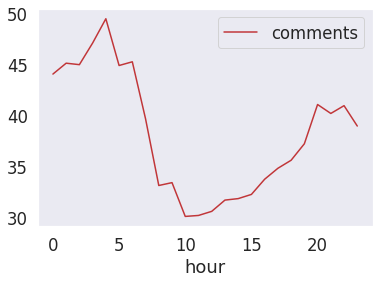

In [ ]:
df[df.domain == 'habrahabr.ru'].groupby('hour')[['comments']].mean().plot()

# **4. Кого из топ-20 авторов чаще всего минусуют?**
@Mordatyj
@Mithgol
@alizar
@ilya42

In [ ]:
top = ['@Mordatyj','@Mithgol', '@alizar', '@ilya42']
df[df.author.isin(top)].groupby('author')[['votes_minus']].count().sort_values('votes_minus')

,votes_minus
author,
@ilya42,512
@Mordatyj,543
@Mithgol,555
@alizar,5264


In [ ]:
df[df.author.isin(top)].groupby('author')[['votes_minus']].mean().sort_values('votes_minus')

,votes_minus
author,
@ilya42,6.216797
@Mordatyj,7.471455
@alizar,7.928191
@Mithgol,20.481081


# **5. Сравните субботы и понедельники**
Правда ли, что по субботам авторы пишут в основном днём, а по понедельникам — в основном вечером?

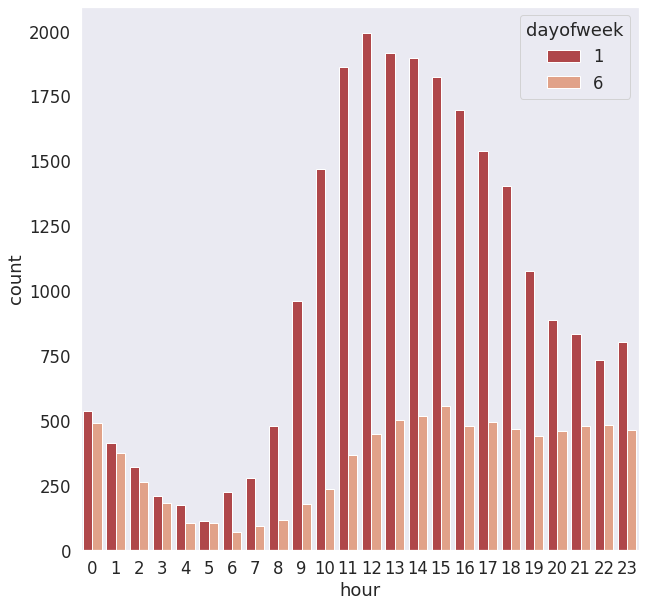

In [ ]:
data = df[df.dayofweek.isin([1, 6])]
fig = plt.figure(figsize=(10,10))
sns.countplot(x = 'hour', hue = 'dayofweek', data = data);